Relatório VALE3

1. Introdução

Os principais fatores que influenciam o preço desse ativo são: 

- Preço do Minério de Ferro: A Vale é uma das maiores produtoras de minério de ferro do mundo, então o preço dessa commodity no mercado internacional impacta diretamente sua receita e lucratividade.
- Produção e Volume de Vendas: O volume de extração, produção e vendas de minério de ferro, níquel e cobre influencia a receita da empresa.
Qualquer problema operacional, como acidentes, greves ou falhas logísticas, pode afetar a produção e, consequentemente, o preço da ação.
- Dividendos e Política de Distribuição de Lucros: A Vale tem um histórico de pagamento de dividendos elevados, e mudanças na política de distribuição podem afetar a atratividade da ação.
Investidores institucionais olham os dividendos como um fator importante para decidir se continuam investindo na empresa.
- Cotação do Dólar (USD/BRL): A Vale vende minério de ferro em dólares, mas tem custos em reais.
Se o dólar sobe, a empresa pode lucrar mais com exportações, beneficiando o preço da ação.
Se o real se valoriza, a receita da empresa pode ser impactada negativamente.

Outros fatores isolados que podem influenciar o preço desse ativo são fatores naturais, como o rompimento de barragens (Mariana e Brumadinho), problemas de importações na China, taxas aduaneiras, etc.

Vale ressaltar que a Vale é uma das poucas empresas brasileiras que se beneficia com a alta do dólar, já que o minério de ferro é vendido em dólares internacionalmente. 

2. Análise
Primeiro, faz sentido tentar entender o cenário macro da Vale no ano de 2024. Como já foi mencionado na introdução, a ação dela é fortemente influenciada por fatores macroeconômicos. 

Análise de 2024:

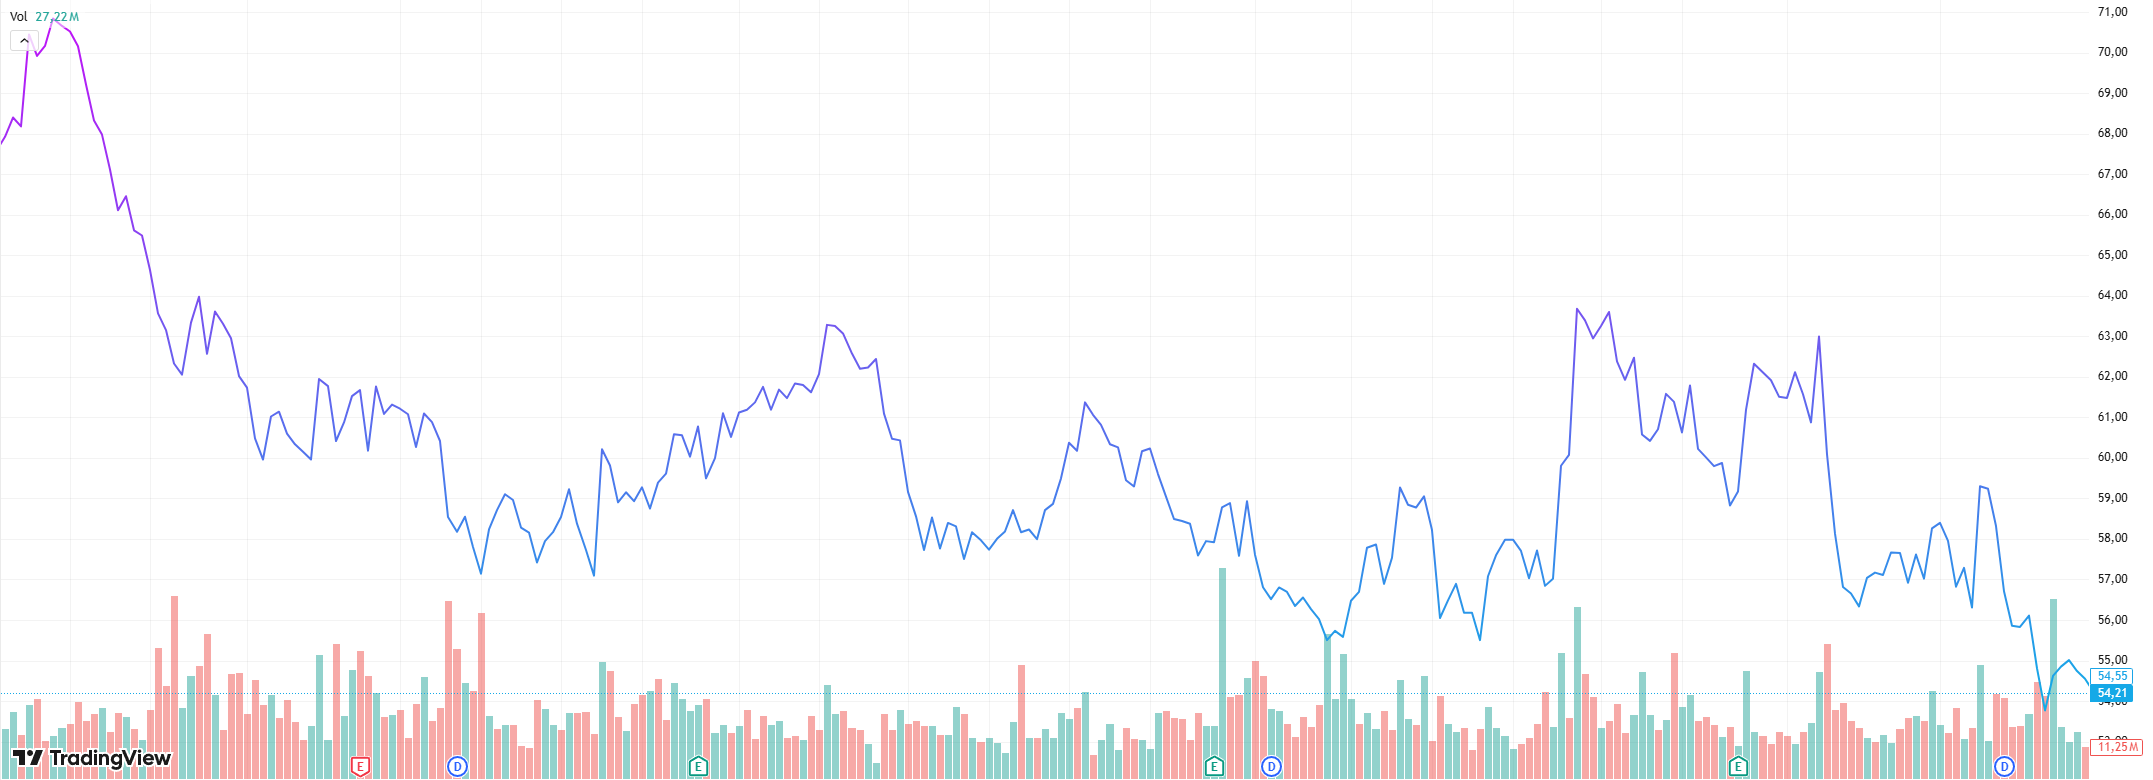

O gráfico acima (TradingView) nos mostra a variação das ações VALE3 no ano de 2024, com queda de 70,51 para 54,42 (-23,2%) por ação de 02/01/2024 até 30/12/2024. 
A queda das ações da VALE3 esse ano se deu principalmente devido a problemas com seu maior vendendor, a China (60% do total vendido), em um período onde a economia chinesa está enfraquecida devido a crises imobiliárias em seu mercado interno. Além disso, o preço no minério de ferro caiu 25% em 2024 e tende a cair mais levando em conta essa situação (Valor). 

Os resultados anuais da empresa foram batidos com margem de 2% se comparado ao ano de 2023, com valor total de 306,65 milhões de toneladas vendidas. 

Analisando o 4T24 da Vale em termos de resultado, vemos um volume de importação em queda se comparado ao mesmo período do ano passado, com 81,3 milhões de toneladas de ferro, queda de 4,6% se comparado ao mesmo período do ano passado (E-Investidor). Apesar disso, a meta anual de vendas foi batida. O resultado foi divulgado no dia 28/01/2025 e provocou uma queda no preço das ações VALE3 nesse dia, que abriram com alta de 53,50 reais por ação e fecharam com baixa de 52,63 em um período de 7h50 de mercado aberto (10h até 17h50). 

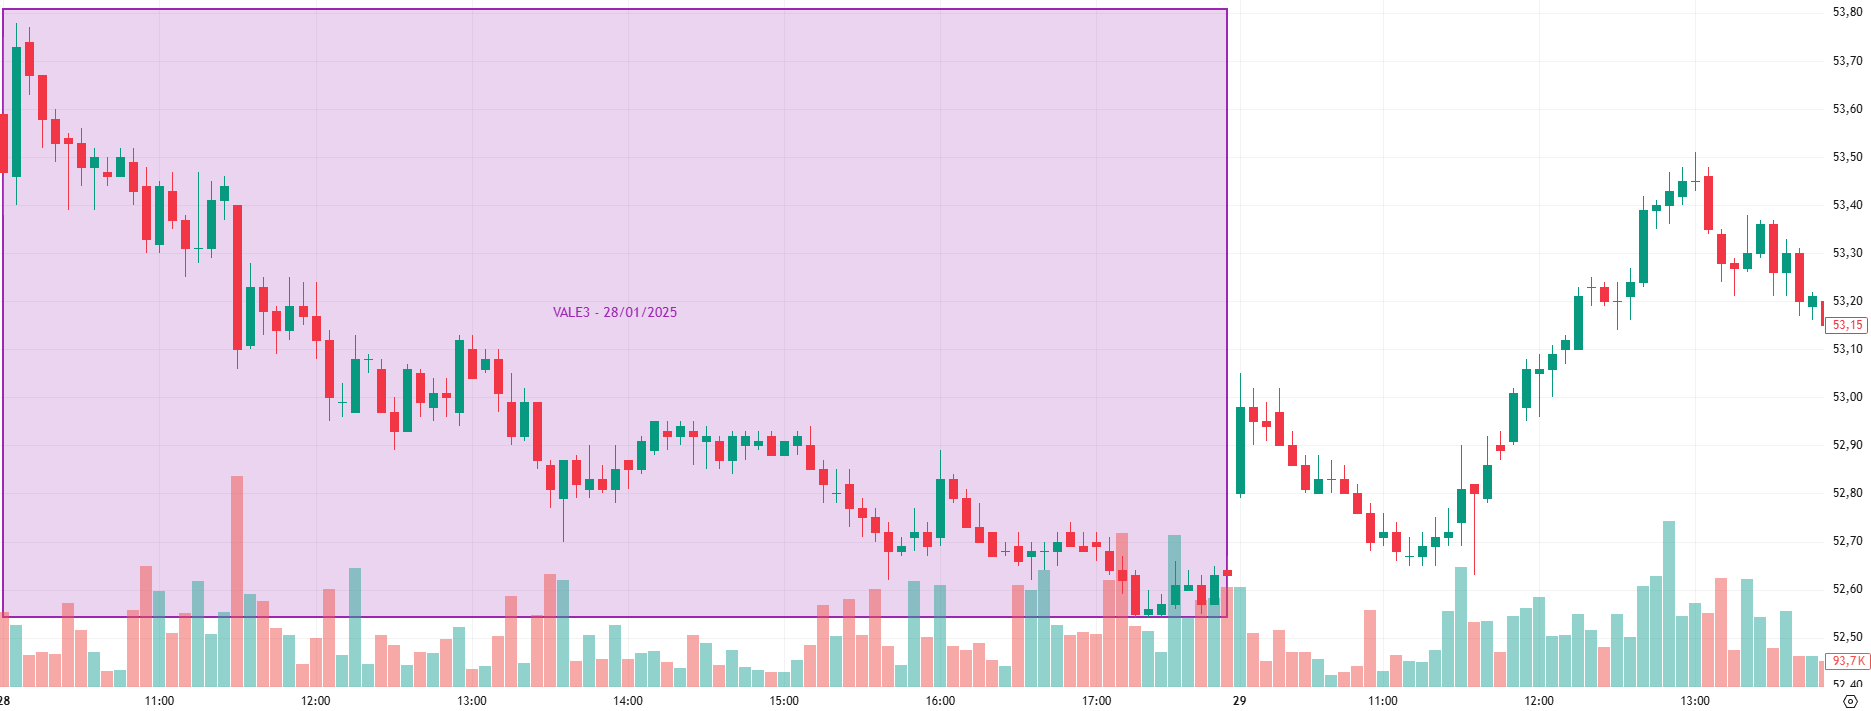

3. Análise de Dados Básica 

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime

Essa análise vai utilizar dados do Yahoo Finance que são puxados pela biblioteca yfinance. 
Baixamos um dataset que contém dados históricos sobre a abertura, máxima, mínima, fechamento, fechamento ajustado e volume da VALE3. 

Depois, testamos utilizando o df.head para verificar se o código encontrou os valores de um período específico corretamente, nesse caso, os primeiros 50 dias de 2023.

Obs: em alguns casos, o fechamento ajustado não aparece, falei para o código considerar que ele é igual ao fechamento normal caso ele não seja aplicável. 

In [2]:
def fetch_data_vale3(start_date, end_date):
    ticker = "VALE3.SA"  
    df = yf.download(ticker, start=start_date, end=end_date)
    if 'Adj Close' not in df.columns:
        df['Adj Close'] = df['Close']  
    return df

In [3]:
df = fetch_data_vale3("2023-01-01", "2024-01-01")
df.head(50)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,Adj Close
Ticker,VALE3.SA,VALE3.SA,VALE3.SA,VALE3.SA,VALE3.SA,
Date,,,,,,
2023-01-02,76.958832,77.389250,76.209901,76.339028,12783800,76.958832
2023-01-03,76.821091,77.552801,76.519799,76.958828,25332600,76.821091
2023-01-04,76.958832,77.174041,75.710614,76.872749,26395300,76.958832
2023-01-05,78.250092,78.921543,76.614500,77.010484,29085600,78.250092
2023-01-06,79.489693,79.834029,78.336174,78.336174,31420600,79.489693
2023-01-09,79.575775,80.049232,78.551377,78.792410,19285800,79.575775
2023-01-10,80.557137,80.832604,79.489694,79.618821,19821100,80.557137
2023-01-11,80.273056,81.331889,79.420829,80.910074,23834100,80.273056


Agora, faremos a análise do retorno diário, da média móvel e da volatilidade da ação, adicionando eles no nosso dataset a partir daqui. 

In [13]:
df['Daily Return'] = df['Adj Close'].pct_change()
all_days = len(df)
df['Moving Average'] = df['Adj Close'].rolling(window=all_days, min_periods=1).mean()
df['Volatility'] = df['Daily Return'].rolling(window=all_days).std()

In [14]:
df.head()

Price,Close,High,Low,Open,Volume,Adj Close,Daily Return,Moving Average,Volatility
Ticker,VALE3.SA,VALE3.SA,VALE3.SA,VALE3.SA,VALE3.SA,,,,
Date,,,,,,,,,
2023-01-02,76.958832,77.389250,76.209901,76.339028,12783800,76.958832,NaN,76.958832,NaN
2023-01-03,76.821091,77.552801,76.519799,76.958828,25332600,76.821091,-0.001790,76.889961,NaN
2023-01-04,76.958832,77.174041,75.710614,76.872749,26395300,76.958832,0.001793,76.912918,NaN
2023-01-05,78.250092,78.921543,76.614500,77.010484,29085600,78.250092,0.016779,77.247211,NaN
2023-01-06,79.489693,79.834029,78.336174,78.336174,31420600,79.489693,0.015842,77.695708,NaN


In [15]:
print(df[['Adj Close', 'Moving Average']].head(60)) 

Price       Adj Close Moving Average
Ticker                              
Date                                
2023-01-02  76.958832      76.958832
2023-01-03  76.821091      76.889961
2023-01-04  76.958832      76.912918
2023-01-05  78.250092      77.247211
2023-01-06  79.489693      77.695708
2023-01-09  79.575775      78.009052
2023-01-10  80.557137      78.373064
2023-01-11  80.273056      78.610563
2023-01-12  80.694862      78.842152
2023-01-13  80.763733      79.034310
2023-01-16  79.412216      79.068665
2023-01-17  79.308907      79.088685
2023-01-18  80.350517      79.185749
2023-01-19  80.694862      79.293543
2023-01-20  80.910072      79.401312
2023-01-23  81.176933      79.512288
2023-01-24  82.037773      79.660846
2023-01-25  82.812515      79.835939
2023-01-26  84.362015      80.074153
2023-01-27  82.054985      80.173195
2023-01-30  81.762306      80.248867
2023-01-31  81.357719      80.299269
2023-02-01  80.453835      80.305989
2023-02-02  76.735008      80.157199
2

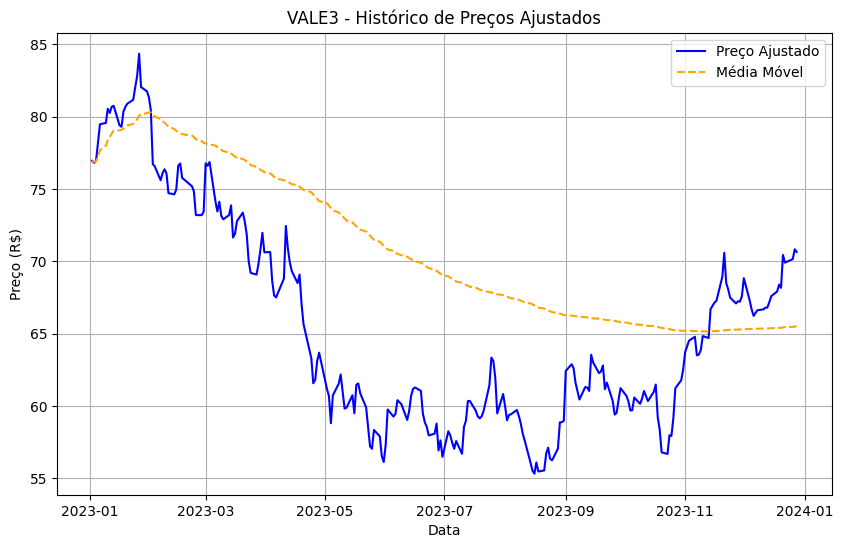

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(df['Adj Close'], label='Preço Ajustado', color='blue')
plt.plot(df['Moving Average'], label='Média Móvel', linestyle='--', color='orange')
plt.title('VALE3 - Histórico de Preços Ajustados')
plt.xlabel('Data')
plt.ylabel('Preço (R$)')
plt.legend()
plt.grid()
plt.show()

Obs: Os Retornos Diários são calculados de acordo com a seguinte fórmula:

Retorno Diário = (Preço Ajustado de Hoje - Preço Ajustado de Ontem) / Preço Ajustado de Ontem

In [17]:
fig = px.line(
    df,  
    y='Daily Return',
    title='VALE3 - Retornos Diários',  
    template='plotly_dark'
    )

fig.update_layout(
    yaxis_tickformat=".2%" 
)

fig.show()

Fazendo as mesmas análises para atualmente, considerando um período do início de 2024 até o dia de hoje. 

In [18]:
from datetime import datetime
now = datetime.now() 
time = now.strftime("%Y-%m-%d")
print(time)

2025-02-14


Sempre que a célula acima for rodada, o programa abaixo fará as análises até o dia atual. 

In [19]:
df2 = fetch_data_vale3("2024-01-01", time)
df2.tail(50)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,Adj Close
Ticker,VALE3.SA,VALE3.SA,VALE3.SA,VALE3.SA,VALE3.SA,
Date,,,,,,
2024-12-02,58.398762,58.854695,58.170797,58.329381,18972100,58.398762
2024-12-03,57.952744,58.834869,57.952744,58.775399,15957500,57.952744
2024-12-04,56.822830,57.962654,56.456101,57.883364,25109200,56.822830
2024-12-05,57.288670,57.288670,56.366897,56.951677,14160000,57.288670
2024-12-06,56.307430,57.149909,56.247960,56.961591,17897900,56.307430
2024-12-09,59.300713,59.657525,57.853626,57.982477,40440600,59.300713
2024-12-10,59.241245,59.409740,58.765492,59.211512,13089300,59.241245
2024-12-11,58.319469,59.062835,57.932920,58.973631,30138500,58.319469


In [20]:
df2['Daily Return'] = df2['Adj Close'].pct_change()
all_days = len(df)
df2['Moving Average'] = df2['Adj Close'].rolling(window=all_days, min_periods=1).mean()
df2['Volatility'] = df2['Daily Return'].rolling(window=all_days).std()

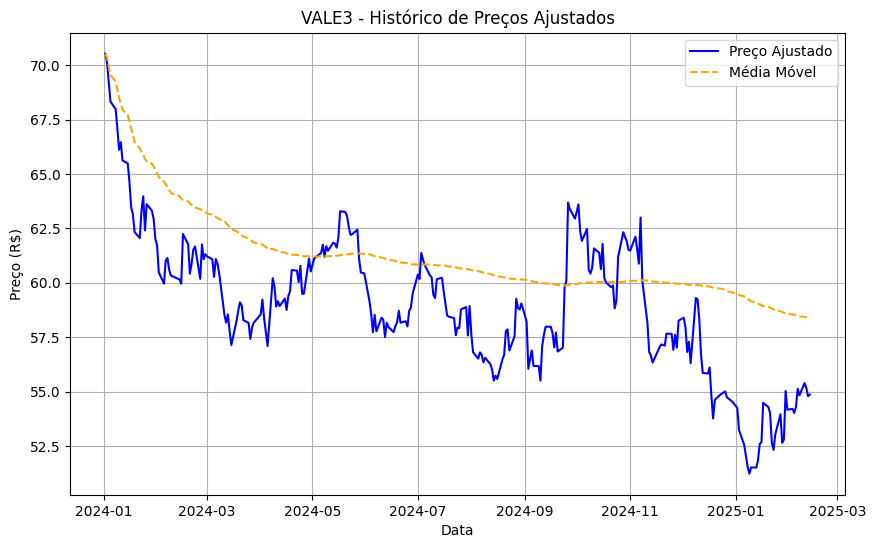

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(df2['Adj Close'], label='Preço Ajustado', color='blue')
plt.plot(df2['Moving Average'], label='Média Móvel', linestyle='--', color='orange')
plt.title('VALE3 - Histórico de Preços Ajustados')
plt.xlabel('Data')
plt.ylabel('Preço (R$)')
plt.legend()
plt.grid()
plt.show()

fig = px.line(
    df2, 
    y='Daily Return',
    title='VALE3 - Retornos Diários',  
    template='plotly_dark'
    )

fig.update_layout(
    yaxis_tickformat=".2%" 
)

fig.show()

Aqui, vamos puxar o DFC (Fluxo de Caixa Descontado) da VALE3. A ideia é encontrar os valores da Taxa Interna de Retorno e do Valor Presente Líquido. 

Depois, vou calcular ele na mão apenas por fins de prática.

In [24]:
from yahooquery import Ticker

# Definir o ticker da empresa
ticker = "VALE3.SA"  # Para ações da B3, use ".SA" no final

# Criar o objeto Ticker
stock = Ticker(ticker)

# Buscar os dados financeiros
dcf_data = stock.valuation_measures

# Exibir os dados do DCF
print(dcf_data)

           asOfDate periodType  EnterpriseValue  EnterprisesValueEBITDARatio  \
symbol                                                                         
VALE3.SA 2023-09-30         3M     3.483763e+11                      4.03360   
VALE3.SA 2023-12-31         3M     3.921964e+11                      5.39800   
VALE3.SA 2024-03-31         3M     3.262822e+11                      4.31040   
VALE3.SA 2024-04-02        TTM              NaN                          NaN   
VALE3.SA 2024-04-04        TTM              NaN                     21.63143   
VALE3.SA 2024-06-10        TTM     3.330925e+11                      4.04390   
VALE3.SA 2024-06-30         3M     3.380351e+11                      4.97420   
VALE3.SA 2024-07-12        TTM     3.401933e+11                      5.06350   
VALE3.SA 2024-09-19        TTM     3.089141e+11                      3.63600   
VALE3.SA 2024-09-30         3M     3.311477e+11                      3.91760   
VALE3.SA 2025-02-13        TTM     3.030

Aqui vemos os seguintes valores:
- EV: R$ 303.059.500.000 
- EV/EBITDA: 3,4666 
- Market Cap: R$ 248.586.100.000 

Os outros dados ficaram bem bagunçados, então faz sentido que eles sejam calculados para achar um valor de DCF coerente. 

In [31]:
#Calcular o DCF (preciso de mais informação)

Vamos fazer tammbém uma análise de ML dos dados apresentados. 
Primeiro, coloquei uma regressão linear e vou comparar ela com o modelo da VALE3 a longo prazo, para verificar se o modelo da VALE3 é um modelo de fácil previsão ou não históricamente. 

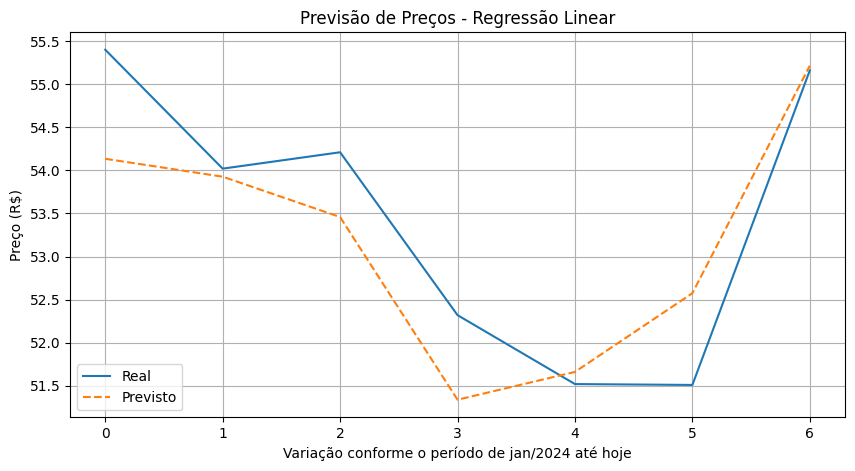

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Criar variáveis independentes e dependente
df2['Target'] = df2['Adj Close'].shift(-1)  # Prever o preço do dia seguinte
df2.dropna(inplace=True)

X = df2[['Open', 'High', 'Low', 'Volume']]
y = df2['Target']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Plotar resultados
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Real")
plt.plot(y_pred, label="Previsto", linestyle="--")
plt.legend()
plt.title("Previsão de Preços - Regressão Linear")
plt.xlabel('Variação conforme o período de jan/2024 até hoje')
plt.ylabel('Preço (R$)')
plt.grid()
plt.show()


Agora, vamos fazer para aproximidamente os últimos 10 anos e verificar como a regressão linear se comporta. 

In [41]:
df3 = fetch_data_vale3("2020-01-01", time)
df3.head(50)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,Adj Close
Ticker,VALE3.SA,VALE3.SA,VALE3.SA,VALE3.SA,VALE3.SA,
Date,,,,,,
2020-01-02,34.819256,34.889751,34.447542,34.594945,17509700,34.819256
2020-01-03,34.562893,34.928197,34.338584,34.402672,17284800,34.562893
2020-01-06,34.357819,34.479586,34.063012,34.479586,32787800,34.357819
2020-01-07,34.607758,34.729525,34.223228,34.287315,16326400,34.607758
2020-01-08,34.614174,34.844893,34.364229,34.735944,15298500,34.614174
2020-01-09,34.159138,34.524442,33.998917,34.447536,14638000,34.159138
2020-01-10,34.197601,34.524451,34.037380,34.447546,9129200,34.197601
2020-01-13,35.440910,35.658811,34.293727,34.377042,27497400,35.440910


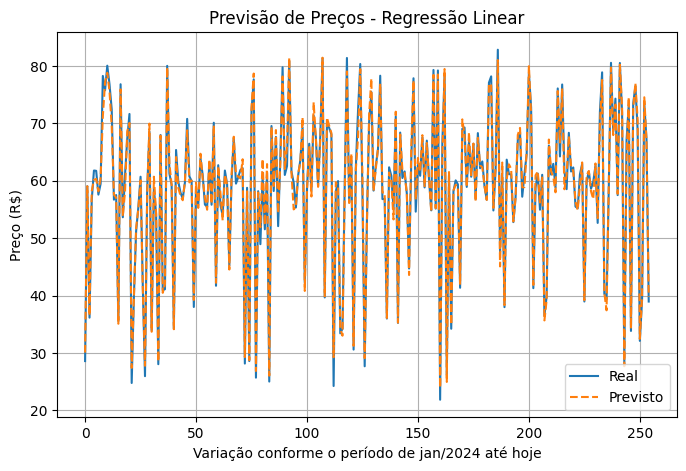

In [43]:
df3['Target'] = df3['Adj Close'].shift(-1)  # Prever o preço do dia seguinte
df3.dropna(inplace=True)

X = df3[['Open', 'High', 'Low', 'Volume']]
y = df3['Target']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Plotar resultados
plt.figure(figsize=(8,5))
plt.plot(y_test.values, label="Real")
plt.plot(y_pred, label="Previsto", linestyle="--")
plt.legend()
plt.title("Previsão de Preços - Regressão Linear")
plt.xlabel('Variação conforme o período de jan/2024 até hoje')
plt.ylabel('Preço (R$)')
plt.grid()
plt.show()